# DSCI 503 – Project 04
### Nicholas Allen
Due Sunday March 6, 2022

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis
This section consists of importing data to a dataframe and inspecting the structure

In [2]:
fc = pd.read_table('forest_cover.txt', sep = '\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Next we inspect the size of the dataframe

In [3]:
fc.shape

(15120, 13)

Now we view the distribution of the seven tree cover types

In [4]:
fc.loc[:,'Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Proceeding is a list of seven colors used to distinguish the cover types in plots

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
This section begins the determination of covertypes withn the wilderness areas contained in the dataframe

In [6]:
fc.loc[:,'Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

Proceeding is a dataframe that determines the number of regions with each cover typ

In [7]:
ct_by_wa = pd.crosstab(fc.loc[:,'Cover_Type'],fc.loc[:,'Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


The above dataframe is now shown visually in bar chart form

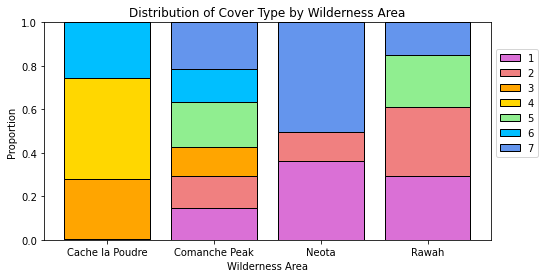

In [8]:
ct_by_wa_props = ct_by_wa / np.sum(ct_by_wa)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
plt.figure(figsize=[8,4])
for i in range(len(ct_by_wa_props)):
    plt.bar(x=ct_by_wa.columns, height=ct_by_wa_props.iloc[i,:], label=ct_by_wa.index[i], color=palette[i], edgecolor='black', bottom=bb.iloc[i,:])

plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1,.9))
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
In this section we examine soil type and cover type relationships, beggining with a dataframe counting the covertype regions per each soil type

In [9]:
ct_by_st = pd.crosstab(fc.loc[:,'Cover_Type'], fc.loc[:,'Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


similar to before, we create another stacked bar chart to represent the relationships visually.

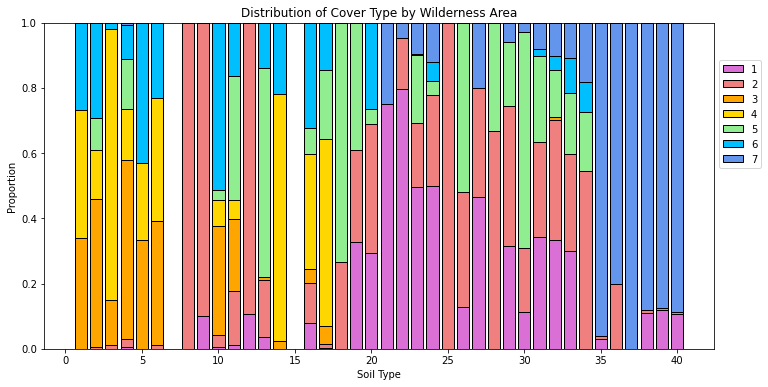

In [10]:
ct_by_st_props = ct_by_st / np.sum(ct_by_st)
bb = np.cumsum(ct_by_st_props) - ct_by_st_props
plt.figure(figsize=[12,6])
for i in range(len(ct_by_st_props)):
    plt.bar(x=ct_by_st.columns, height=ct_by_st_props.iloc[i,:], label=ct_by_st.index[i], color=palette[i], edgecolor='black', bottom=bb.iloc[i,:])

plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1,.9))
plt.show()

## Part 4: Distribution of Elevation by Cover Type
Continuing the theme of the past sections, we investigate the relationships between cover type an elevation. We begin by computing the average elevation for each of the seven cover types

In [11]:
ct_by_el = fc.loc[:,{'Elevation', 'Cover_Type'}].groupby('Cover_Type').mean()
ct_by_el

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Like before, we wish to visually represent our findings. This iteration we accomplish that goal via use of a histogram.

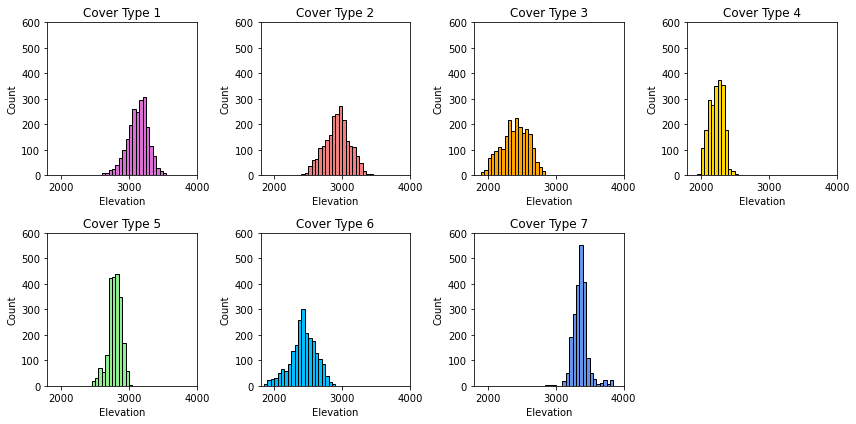

In [12]:
plt.figure(figsize=[12,6])
for j in range(1,8):
    plt.subplot(2,4,j)
    plt.hist(fc.loc[fc.loc[:,'Cover_Type']==ct_by_el.index[j-1],'Elevation'], edgecolor='black', color=palette[j-1], bins=np.arange(1800, 4050, 50))
    plt.title(f'Cover Type {ct_by_el.index[j-1]}')
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
This section encodes the categorical variables and tests model acurracy, beginning with datframe creation to separate catgeory and nuymeric variables.

In [13]:
X_num = fc.loc[:,{'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'}].values
X_cat = fc.loc[:,{'Wilderness_Area', 'Soil_Type',}].values
y = fc.loc[:,'Cover_Type'].values
print(f'Numerical Feature Array Shape:   {X_num.shape}')
print(f'Categorical Feature Array Shape: {X_cat.shape}')
print(f'Label Array Shape:               {y.shape}')

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


One Hot Encoding will now transfrom our categorical variables into numerical values

In [14]:
OHE = OneHotEncoder(sparse=False)
X_enc = OHE.fit(X_cat)
X_enc = OHE.transform(X_cat)
print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


In [15]:
X = np.hstack((X_num, X_enc))
print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


Following is the division of data into three distinct sets, training, validation, and testing for the purpose of evaluating our models effectiveness.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state=1, stratify=y_hold)

print(f'Training Features Shape:   {X_train.shape}')
print(f'Validation Features Shape: {X_valid.shape}')
print(f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model
In this section we will create a logistic regression type model for predicting Cover Type

In [17]:
lr_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, multi_class='multinomial')
lr_mod.fit(X_train, y_train)

print(f'Training Accuracy:   {np.round(lr_mod.score(X_train, y_train),4)}')
print(f'Validation Accuracy: {np.round(lr_mod.score(X_valid, y_valid),4)}')

Training Accuracy:   0.6183
Validation Accuracy: 0.6177


C:\Users\Nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
In this section we will create a Decision Tree type model for predicting Cover Type

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2,30)
for d in depth_range:
    rand = np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=rand)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]
print(f'Optimal value for max_depth:           {dt_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {np.round(dt_train_acc[dt_idx],4)}')
print(f'Validation Accuracy for Optimal Model: {np.round(dt_valid_acc[dt_idx],4)}')

Optimal value for max_depth:           17
Training Accuracy for Optimal Model:   0.9718
Validation Accuracy for Optimal Model: 0.7751


Now we plot the training and validation acuracies as a function of max depth

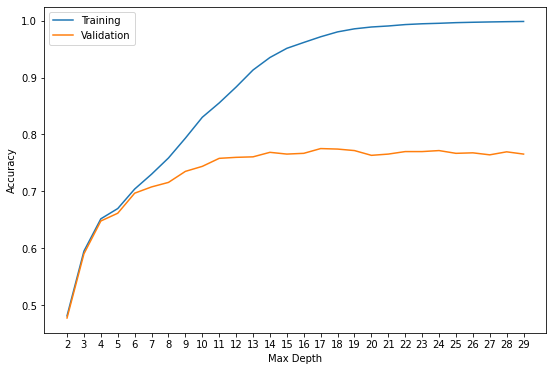

In [19]:
plt.figure(figsize=([9, 6]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

## Part 8: Random Forest Models
In this section we will create a Random Forest type model for predicting Cover Type

In [20]:
rf_train_acc = []
rf_valid_acc = []
for d in depth_range:             #using the same range as created in previous cell
    rand_seed = np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=rand_seed)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]
print(f'Optimal value for max_depth:           {rf_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx],4)}')
print(f'Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx],4)}')

Optimal value for max_depth:           26
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8677


Again, we plot the training and validation acuracies as a function of max depth

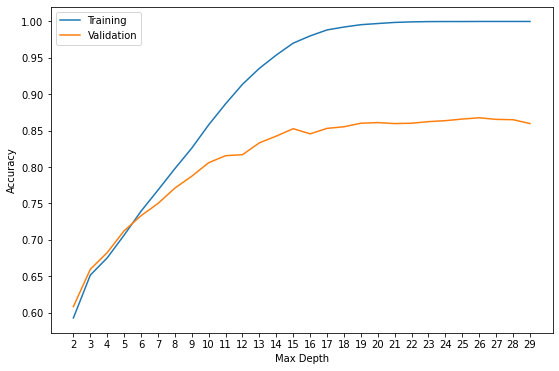

In [21]:
plt.figure(figsize=([9, 6]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
In this section we will choose our final model and evaluate that model's effectiveness using the Test dataset. 
Given the validation accuracy was highest with the Random Forest Model, we will move forward with that model type. Specifically, our hyperparameter tuning inidcates a max depth of 23 provides the best results. We will continue with a random state of 1. 

In [22]:
final_seed = np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100, max_depth=23, random_state=final_seed)
final_model.fit(X_train, y_train)
print(f'Training Accuracy for Final Model:   {np.round(final_model.score(X_train, y_train),4)}')
print(f'Validation Accuracy for Final Model: {np.round(final_model.score(X_valid, y_valid),4)}')
print(f'Testing Accuracy for Final Model:    {np.round(final_model.score(X_test, y_test),4)}')

Training Accuracy for Final Model:   0.9998
Validation Accuracy for Final Model: 0.8624
Testing Accuracy for Final Model:    0.8536


Below is a confusion matrix for our final model

In [23]:
test_pred = final_model.predict(X_test)
array = confusion_matrix(y_test, test_pred)
df = pd.DataFrame(array)
df.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}, inplace=True)
df.rename(index={0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}, inplace=True)
df.index.rename('Cover Type', inplace=True)
df

,1,2,3,4,5,6,7
Cover Type,,,,,,,
1,233,61,2,0,6,0,22
2,54,241,6,0,12,9,2
3,0,1,257,19,3,44,0
4,0,0,7,314,0,3,0
5,0,12,4,0,303,5,0
6,0,0,35,13,2,274,0
7,9,1,0,0,0,0,314


Lastly we generate a classification report to see other effectiveness measures

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.72      0.75       324
           2       0.76      0.74      0.75       324
           3       0.83      0.79      0.81       324
           4       0.91      0.97      0.94       324
           5       0.93      0.94      0.93       324
           6       0.82      0.85      0.83       324
           7       0.93      0.97      0.95       324

    accuracy                           0.85      2268
   macro avg       0.85      0.85      0.85      2268
weighted avg       0.85      0.85      0.85      2268

